In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("FuelConsumption.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [33]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


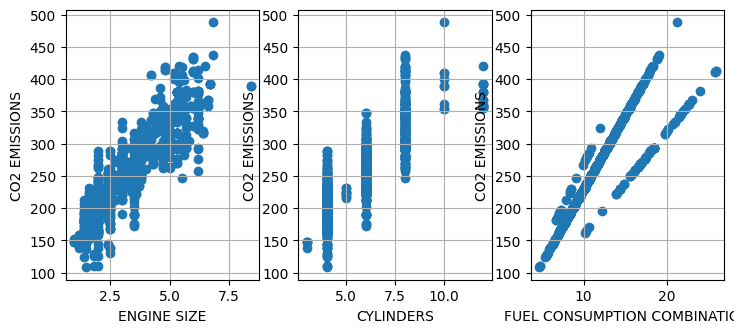

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3 , figsize=(8.5,3.5))
axs[0].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
axs[0].set_xlabel("ENGINE SIZE")
axs[0].set_ylabel("CO2 EMISSIONS")
axs[0].grid()

axs[1].scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
axs[1].set_xlabel("CYLINDERS")
axs[1].set_ylabel("CO2 EMISSIONS")
axs[1].grid()

axs[2].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
axs[2].set_xlabel("FUEL CONSUMPTION COMBINATION")
axs[2].set_ylabel("CO2 EMISSIONS")
axs[2].grid()

In [35]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
pd.set_option('display.max_rows',None)
print(train)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
5            3.5          6                  10.0           230
6            3.5          6                  10.1           232
8            3.7          6                  11.6           267
9            2.4          4                   9.2           212
10           2.4          4                   9.8           225
11           3.5          6                  10.4           239
12           5.9         12                  15.6           359
13           5.9         12                  15.6           359
14           4.7          8                  14.7           338
15           4.7          8             

Intercept is 126 and the Coeffiecient is 38 (numbers are approximate)


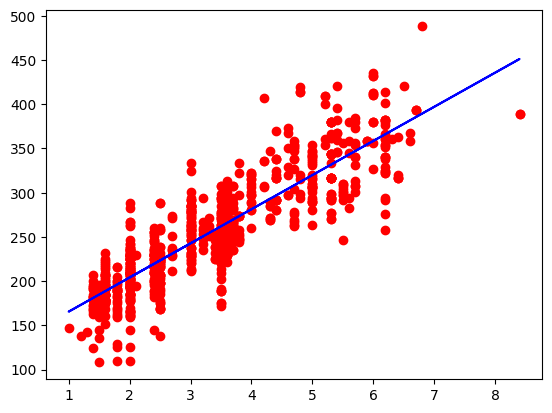

In [36]:
from sklearn import linear_model
reg_line = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg_line.fit(train_x , train_y)
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS, color='red')
plt.plot(train_x ,  reg_line.coef_*train_x + reg_line.intercept_, color='blue')
print("Intercept is %d and the Coeffiecient is %d (numbers are approximate)" %(reg_line.intercept_ , reg_line.coef_))

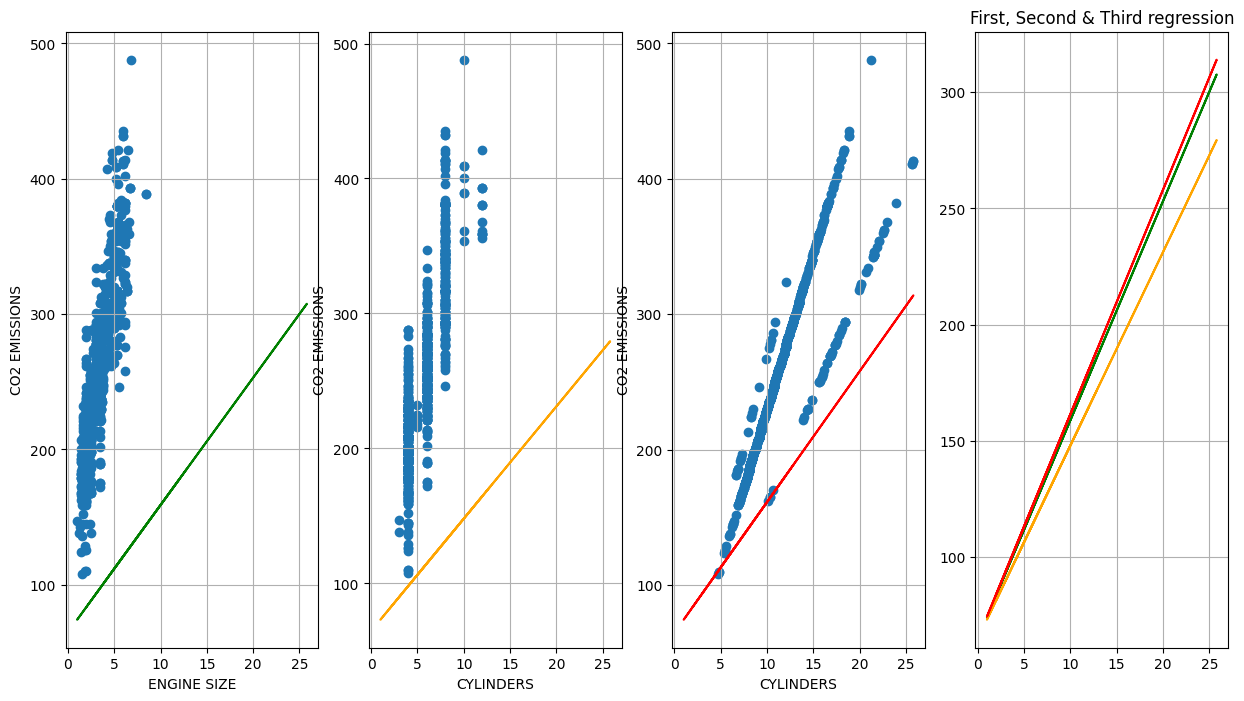

In [37]:
x = np.array(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y = train_y
reg_line.fit(x,y)

fig, axs = plt.subplots(nrows=1 , ncols=4, figsize=(15,8))

# the brackets have been used because the coefficient array is a 2 dimensional array so, for example,
# for calling the first coefficient we have to say "the first row and the first column" and for the others,
# only the columns will change because it has only 1 row.

first_coef = reg_line.coef_[0][0]
sec_coef = reg_line.coef_[0][1]
third_coef = reg_line.coef_[0][2]
average_coefficient = first_coef + sec_coef + third_coef / 3


axs[0].scatter(train.ENGINESIZE, train.CO2EMISSIONS)
axs[0].set_xlabel("ENGINE SIZE")
axs[0].set_ylabel("CO2 EMISSIONS")
axs[0].plot(x, first_coef*x + reg_line.intercept_ , color="green")
axs[0].grid()

axs[1].scatter(train.CYLINDERS, train.CO2EMISSIONS)
axs[1].set_xlabel("CYLINDERS")
axs[1].set_ylabel("CO2 EMISSIONS")
axs[1].plot(x, sec_coef*x + reg_line.intercept_ , color="orange")
axs[1].grid()

axs[2].scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS)
axs[2].set_xlabel("CYLINDERS")
axs[2].set_ylabel("CO2 EMISSIONS")
axs[2].plot(x, third_coef*x + reg_line.intercept_ , color="red")
axs[2].grid()

axs[3].plot(x, first_coef*x + reg_line.intercept_ , color="green")
axs[3].plot(x, sec_coef*x + reg_line.intercept_ , color="orange")
axs[3].plot(x, third_coef*x + reg_line.intercept_ , color="red")
axs[3].set_title("First, Second & Third regression")
axs[3].grid()

In [43]:
y_hat= reg_line.predict(test[['ENGINESIZE']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

fig, axs=plt.subplots(nrows=1 , ncols=2, figsize=(15,8))
axs[0].plot(x, average_coefficient*x+reg_line.intercept_, color='grey')
axs[0].grid()
axs[1].plot(y_hat, first_coef*x+reg_line.intercept_, color='purple')
axs[1].grid()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.